In [1]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt


In [2]:
datacount = 1000
seed_start = 0 

trainx = []
trainy = []

for i in range(datacount):
    sdd = seed_start + i
    
    # set the seed for random generator
    np.random.seed(sdd)        
    
    #generate a random number between 0-1
    rad = np.random.rand()   
    
    trainx.append(sdd)
    trainy.append(rad)

In [3]:
# Divide data by half for testing and training
train_X = np.asarray(trainx[0:int(datacount/2)]) 
train_Y = np.asarray(trainy[0:int(datacount/2)])
test_X  = np.asarray(trainx[int(datacount/2):])
test_Y  = np.asarray(trainy[int(datacount/2):])

#Lets do some Standardization on X to scale it down
#otherwise x range is 0:1000 vs 0:1 in y

xmax = max(train_X)
stdx = np.std(train_X)

tmax = max(test_X)
stdt = np.std(test_X)

train_X = (train_X - xmax) / stdx

#test_X  = (test_X - xmax) / stdx
test_X  = (test_X - tmax) / stdt

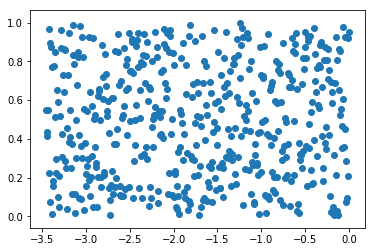

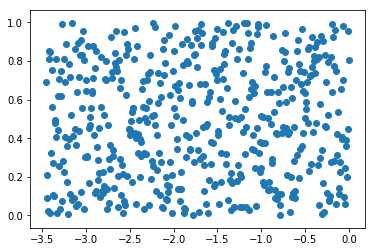

In [4]:
plt.scatter(train_X,train_Y)
plt.show()

plt.scatter(test_X,test_Y)
plt.show()

In [18]:
rng = np.random

# Parameters
learning_rate = 0.01
training_epochs = 2000
display_step = 10

n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn()/100, name="weight")
b = tf.Variable(rng.randn()/100, name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
            "W=", sess.run(W), "b=", sess.run(b))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

Epoch: 0010 cost= 0.097175971 W= -0.07316204 b= 0.03997204
Epoch: 0020 cost= 0.075362720 W= -0.110650584 b= 0.06745901
Epoch: 0030 cost= 0.066507310 W= -0.13247027 b= 0.087602444
Epoch: 0040 cost= 0.062635660 W= -0.14460388 b= 0.103128284
Epoch: 0050 cost= 0.060688745 W= -0.15075962 b= 0.11572809
Epoch: 0060 cost= 0.059494127 W= -0.15323734 b= 0.12645191
Epoch: 0070 cost= 0.058603104 W= -0.15346296 b= 0.13595253
Epoch: 0080 cost= 0.057844102 W= -0.1523183 b= 0.14463584
Epoch: 0090 cost= 0.057151526 W= -0.15035033 b= 0.15275384
Epoch: 0100 cost= 0.056500029 W= -0.14789848 b= 0.16046491
Epoch: 0110 cost= 0.055879608 W= -0.14517213 b= 0.16786805
Epoch: 0120 cost= 0.055285979 W= -0.14230087 b= 0.17502601
Epoch: 0130 cost= 0.054716971 W= -0.13936307 b= 0.18197913
Epoch: 0140 cost= 0.054171287 W= -0.1364088 b= 0.188753
Epoch: 0150 cost= 0.053647928 W= -0.13346799 b= 0.19536443
Epoch: 0160 cost= 0.053145934 W= -0.13055767 b= 0.20182532
Epoch: 0170 cost= 0.052664489 W= -0.12768936 b= 0.2081438

Epoch: 1390 cost= 0.041466128 W= -0.0012714866 b= 0.48307398
Epoch: 1400 cost= 0.041463319 W= -0.0010506036 b= 0.4835559
Epoch: 1410 cost= 0.041460641 W= -0.00083408377 b= 0.48402724
Epoch: 1420 cost= 0.041458070 W= -0.0006220734 b= 0.48448703
Epoch: 1430 cost= 0.041455608 W= -0.0004147283 b= 0.48493668
Epoch: 1440 cost= 0.041453235 W= -0.0002114991 b= 0.48538044
Epoch: 1450 cost= 0.041450970 W= -1.2346715e-05 b= 0.48581296
Epoch: 1460 cost= 0.041448791 W= 0.00018260677 b= 0.48623648
Epoch: 1470 cost= 0.041446708 W= 0.00037352473 b= 0.48665172
Epoch: 1480 cost= 0.041444711 W= 0.0005604142 b= 0.48705673
Epoch: 1490 cost= 0.041442811 W= 0.00074319047 b= 0.48745242
Epoch: 1500 cost= 0.041440964 W= 0.0009220332 b= 0.48784125
Epoch: 1510 cost= 0.041439202 W= 0.0010972564 b= 0.4882232
Epoch: 1520 cost= 0.041437507 W= 0.001269043 b= 0.48859686
Epoch: 1530 cost= 0.041435886 W= 0.0014373163 b= 0.48896396
Epoch: 1540 cost= 0.041434325 W= 0.0016023122 b= 0.48932323
Epoch: 1550 cost= 0.041432839 W

In [5]:
y_res = sess.run(pred, feed_dict={X: train_X})

plt.scatter(train_X,train_Y)
plt.plot(train_X,y_res,linewidth=4, color='r')

plt.show()

NameError: name 'sess' is not defined

Epoch: 0001 cost= 4.274054527
Epoch: 0051 cost= 0.050277609
Epoch: 0101 cost= 0.045571771
Epoch: 0151 cost= 0.043409947
Optimization Finished!
Training cost= 0.041948497 



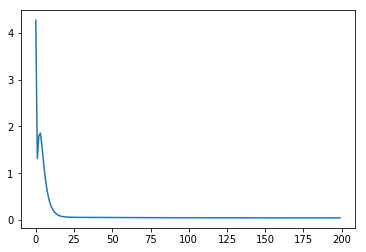

In [19]:
rng = np.random

learning_rate = 0.01
training_epochs = 200
display_step = 50

n_samples = train_X.shape[0]


X = tf.placeholder(tf.float32, [None, 1])
Y = tf.placeholder(tf.float32, [None, 1])

W1 = tf.Variable(rng.randn(1,16), name="weight1",dtype="float")
b1 = tf.Variable(rng.randn(16), name="bias1",dtype="float")

fc1 = tf.nn.relu(tf.matmul(X, W1) + b1)       #out1 = tf.add(tf.multiply(X, W1), b1)


W2 = tf.Variable(rng.randn(16,32), name="weight2",dtype="float")
b2 = tf.Variable(rng.randn(32), name="bias2",dtype="float")

fc2 = tf.nn.relu(tf.matmul(fc1, W2) + b2)

W3 = tf.Variable(rng.randn(32,1), name="weight3",dtype="float")
b3 = tf.Variable(rng.randn(1), name="bias3",dtype="float")

pred = tf.matmul(fc2, W3) + b3                  #pred = tf.nn.relu(tf.matmul(X, W1) + b1)


cost      = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)


init = tf.global_variables_initializer()
loss_history = []

sess = tf.Session()
sess.run(init)

# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x.reshape([1,1]), Y: y.reshape([1,1])})

    c = sess.run(cost, feed_dict={X: train_X.reshape([int(datacount/2),1]), Y:train_Y.reshape([int(datacount/2),1])})     
    loss_history.append(c)
  

    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X.reshape([int(datacount/2),1]), Y: train_Y.reshape([int(datacount/2),1])})
print("Training cost=", training_cost, '\n')


plt.plot(loss_history)
plt.show()


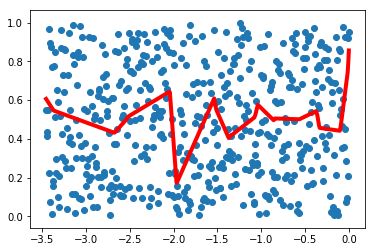

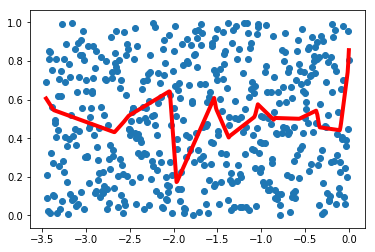

In [23]:
y_res = sess.run(pred, feed_dict={X: train_X.reshape([int(datacount/2),1])})

plt.scatter(train_X,train_Y)
plt.plot(train_X,y_res,linewidth=4, color='r')

plt.show()

y_res_test = sess.run(pred, feed_dict={X: test_X.reshape([int(datacount/2),1])})

plt.scatter(test_X,test_Y)
plt.plot(test_X,y_res_test,linewidth=4, color='r')

plt.show()

Epoch: 0001 cost= 2.714911222
Epoch: 0051 cost= 0.004896538
Epoch: 0101 cost= 0.001964384
Epoch: 0151 cost= 0.001015116
Epoch: 0201 cost= 0.000646001
Epoch: 0251 cost= 0.000475004
Epoch: 0301 cost= 0.000378067
Epoch: 0351 cost= 0.000316266
Epoch: 0401 cost= 0.000274123
Epoch: 0451 cost= 0.000241601
Optimization Finished!
Training cost= 0.00021584418 



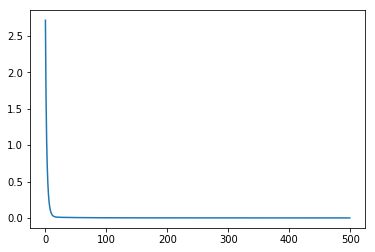

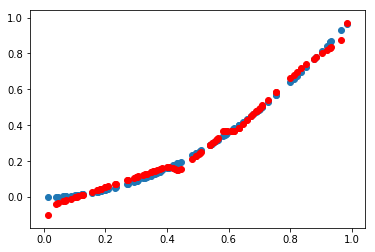

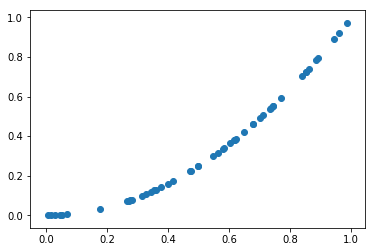

In [4]:
plt.scatter(trainx,trainy)
plt.show()

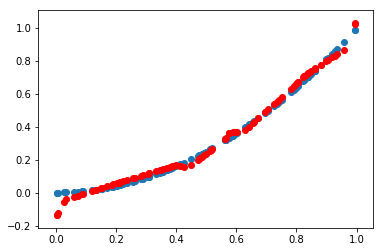

In [7]:
y_res_test = sess.run(pred, feed_dict={X: test_X.reshape([int(datacount/2),1])})

plt.scatter(test_X,test_Y)
plt.scatter(test_X,y_res_test, color='r')

plt.show()